In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import numpy as np

from weavingspace import TileUnit
from weavingspace import Tiling

gpd.__version__

'0.11.0'

In [2]:
# w = gpd.read_file("anthromes/Anthromes-12k-DGG/an12_dgg_inputs/Anthromes-12k-DGG/an12_dgg_inputs.shp")
w = gpd.read_file("NACIS-2022/world-with-oceans-ee.gpkg")

In [14]:
unit = TileUnit(tiling_type = "hex-colouring", 
                #  Note these alternatives:
                #  tiling_type = "hex-dissection", 
                #  tiling_type = "hex-dissection", dissection_offset = 0,
                n = 3, crs = w.crs, 
                spacing = 400000).transform_rotate(15)
tiling = Tiling(unit, w, id_var = "NAME", tile_margin = 20000)

In [15]:
map = tiling.get_tiled_map(prioritise_tiles = True, ragged_edges = True)

/home/osullid3/anaconda3/envs/weaving/lib/python3.10/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/osullid3/anaconda3/envs/weaving/lib/python3.10/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 1
  Warn("Warning: setting k to %d" % k_q, UserWarning)


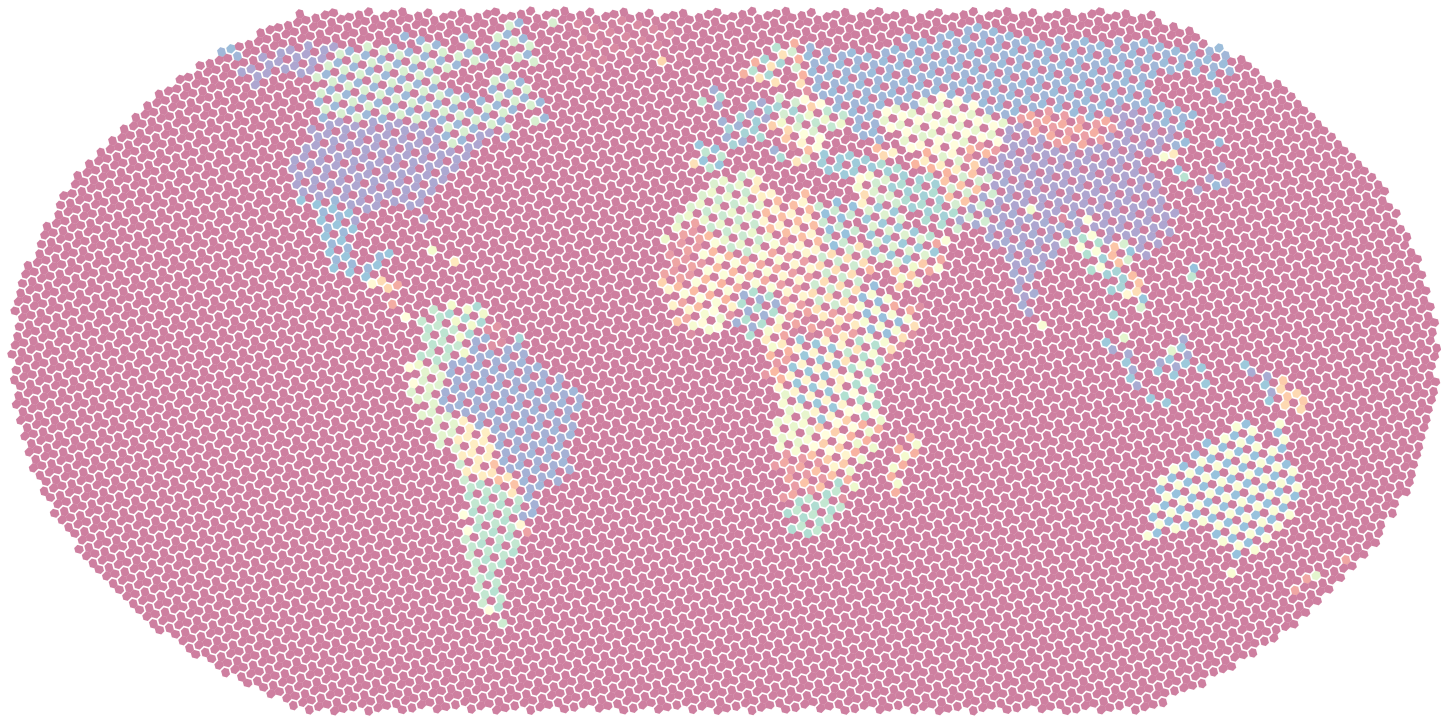

In [16]:
map.variables = dict(zip(list("abc"),
                        ("scalerank", "POP_EST", "GDP_MD")))
map.colourmaps = dict(zip(map.variables.values(), 
                         ("Spectral", "Spectral", "Spectral")))

fig = map.render(legend = False, scheme = "quantiles", alpha = 0.5) # quantiles for interest

In [ ]:
map.dpi = 600  # don't ask me what makes sense for DPI
map.figsize = (10, 7)

fig = map.render(legend = False, scheme = "quantiles")

In [ ]:
fig.savefig("NACIS-2022/output/another-map.svg")